In [1]:
import numpy as np
import matplotlib.pyplot as plt

미분(Differential)

<img src="./differential1.png" align="left" width="300"/>

In [2]:
# diff1(미분할 함수, 미분할 값, Δx)
def diff1(f, x, h=1e-6):
    return (f(x + h) - f(x)) / h

미분(Differential): 대칭 파생

<img src="./differential2.png" align="left" width="300"/>

In [3]:
# diff2(미분할 함수, 미분할 값, Δx)
def diff2(f, x, h=1e-6):
    return (f(x + h) - f(x - h)) / (2 * h)

In [4]:
def f1(x):
    return x ** 2

In [5]:
print(diff1(f1, 1))
print(diff2(f1, 1))

2.0000009999243673
2.000000000002


In [6]:
f2 = lambda x: x ** 2

In [7]:
print(diff1(f2, 1))
print(diff2(f2, 1))

2.0000009999243673
2.000000000002


경사 하강(강하)법

In [8]:
# 경사 하강법 클래스, 옵티마이저
class descent:
    def __init__(self, lr, h=1e-6):
        self.lr = lr # 학습율
        self.h = h # 수치 미분을 위해 지정하는 값으로 작을수록 더 정교한 미분을 실행한다.
        
    def diff(self, f, x): # 미분 함수
        # return (f(x + self.h) - f(x)) / self.h
        return (f(x + self.h) - f(x - self.h)) / (2 * self.h)
        
    def update(self, f, x): # 경사 하강법 업데이트 함수
        dx = self.diff(f, x)
        return x - self.lr * dx
    
    def __str__(self):
        return '경사 하강법(학습율 = {})'.format(self.lr)

In [9]:
# 경사 하강법 시각화 클래스
class one_variable_ftn:
    def __init__(self, ftn, opti):
        self.ftn = ftn # 최적화 하려는 함수
        self.opti = opti # 옵티마이저 <= 경사 하강법, 모멘텀
        
    def run(self, x, iteration): # 옵티마이저 실행 함수
        self.xs = [x]
        for i in range(iteration):
            self.xs.append(self.opti.update(self.ftn, self.xs[-1]))
        print('{}에서 시작해서 {}번 {}을(를) 적용한 결과는 {:5.3f} 입니다.'.format(x, iteration, self.opti, self.xs[-1]))
        
    def visualize(self, xi, xe): # 시각화 함수
        x = np.linspace(xi, xe, int((xe - xi) * 100))
        y = [self.ftn(xx) for xx in x]
        plt.plot(x, y, 'k-') # 2차원 곡선 시각화
        ys = [self.ftn(xx) for xx in self.xs]
        plt.plot(self.xs, ys, 'r*') # 경사 하강법으로 이동하는 위치 시각화
        plt.show()
        
    def history(self):
        for i, x in enumerate(self.xs):
            print('{:3d}번 {}을(를) 적용한 결과는 {:5.3f} 입니다.'.format(i + 1, self.opti, x))

In [10]:
# 경사 하강법 실행
opti = descent(0.01) # 경사 하강법 클래스 객체 생성
print(opti)
f = lambda x: x ** 2 # 미분할 함수
ex = one_variable_ftn(f, opti) # 경사 하강법을 적용한 결과를 시각화 하는 클래스 객체 생성

경사 하강법(학습율 = 0.01)


In [11]:
ex.run(2, 100) # 2에서 출발해서 경사 하강법 100번 적용한다.

2에서 시작해서 100번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.265 입니다.


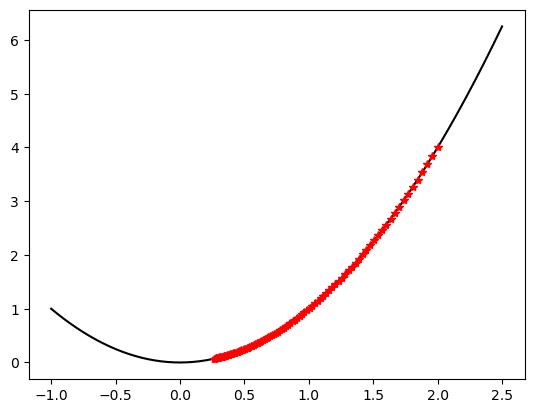

In [12]:
ex.visualize(-1, 2.5) # 경사 하강법 실행 결과 시각화

In [13]:
ex.history()

  1번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 2.000 입니다.
  2번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.960 입니다.
  3번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.921 입니다.
  4번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.882 입니다.
  5번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.845 입니다.
  6번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.808 입니다.
  7번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.772 입니다.
  8번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.736 입니다.
  9번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.702 입니다.
 10번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.667 입니다.
 11번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.634 입니다.
 12번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.601 입니다.
 13번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.569 입니다.
 14번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.538 입니다.
 15번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.507 입니다.
 16번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.477 입니다.
 17번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.448 입니다.
 18번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.419 입니다.
 19번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.390 입니다.
 20번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.362 입니다.
 21번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.335 입니다.
 22번 경사 하강법(학

2에서 시작해서 100번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.000 입니다.


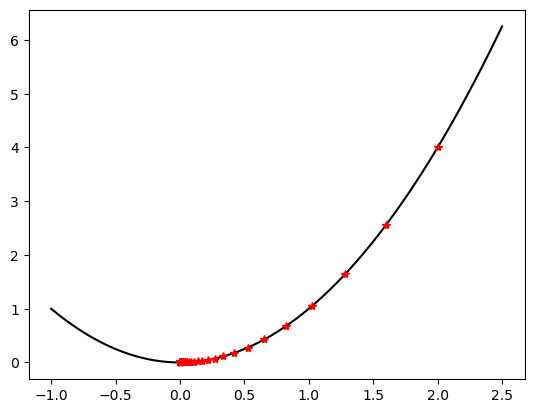

  1번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 2.000 입니다.
  2번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 1.600 입니다.
  3번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 1.280 입니다.
  4번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 1.024 입니다.
  5번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.819 입니다.
  6번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.655 입니다.
  7번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.524 입니다.
  8번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.419 입니다.
  9번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.336 입니다.
 10번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.268 입니다.
 11번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.215 입니다.
 12번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.172 입니다.
 13번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.137 입니다.
 14번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.110 입니다.
 15번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.088 입니다.
 16번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.070 입니다.
 17번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.056 입니다.
 18번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.045 입니다.
 19번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.036 입니다.
 20번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.029 입니다.
 21번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는 0.023 입니다.
 22번 경사 하강법(학습율 = 0.1)을(를) 적용한 결과는

In [14]:
opti = descent(0.1) # 학습율을 0.01에서 0.1로 변경한 경사 하강법
ex = one_variable_ftn(f, opti)
ex.run(2, 100)
ex.visualize(-1, 2.5)
ex.history()

2에서 시작해서 100번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.


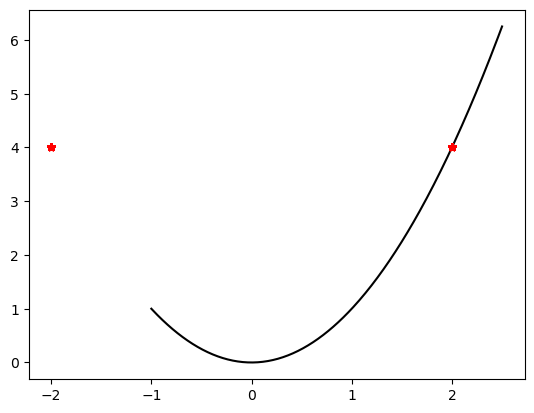

  1번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
  2번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
  3번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
  4번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
  5번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
  6번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
  7번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
  8번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
  9번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
 10번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
 11번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
 12번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
 13번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
 14번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
 15번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
 16번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
 17번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
 18번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
 19번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
 20번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
 21번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 2.000 입니다.
 22번 경사 하강법(학습율 = 1)을(를) 적용한 결과는 -2.000 입니다.
 23번 경사 하강법(학습율 = 1)을

In [15]:
opti = descent(1) # 학습율을 0.01에서 1로 변경한 경사 하강법 => 학습율이 너무 크다.
ex = one_variable_ftn(f, opti)
ex.run(2, 100)
ex.visualize(-1, 2.5)
ex.history()

2에서 시작해서 100번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.637 입니다.


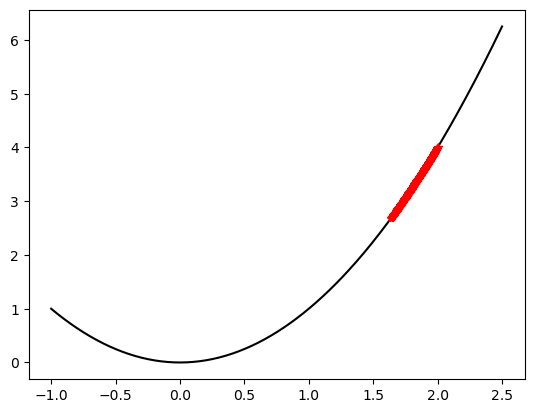

  1번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 2.000 입니다.
  2번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.996 입니다.
  3번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.992 입니다.
  4번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.988 입니다.
  5번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.984 입니다.
  6번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.980 입니다.
  7번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.976 입니다.
  8번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.972 입니다.
  9번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.968 입니다.
 10번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.964 입니다.
 11번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.960 입니다.
 12번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.956 입니다.
 13번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.953 입니다.
 14번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.949 입니다.
 15번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.945 입니다.
 16번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.941 입니다.
 17번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.937 입니다.
 18번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.933 입니다.
 19번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.929 입니다.
 20번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.925 입니다.
 21번 경사 하강법(학습율 = 0.001)을(를) 적용한 결과는 1.9

In [16]:
opti = descent(0.001) # 학습율을 0.01에서 0.001로 변경한 경사 하강법 => 학습율이 너무 작다
ex = one_variable_ftn(f, opti)
ex.run(2, 100)
ex.visualize(-1, 2.5)
ex.history()

In [17]:
# 가운데 평탄한(기울기가 0인) 구간이 있는 함수
def f3(x):
    if x > 1:
        return x ** 2
    elif x > 0.2:
        return 1
    else:
        return 25 * x ** 2

2에서 시작해서 100번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.986 입니다.


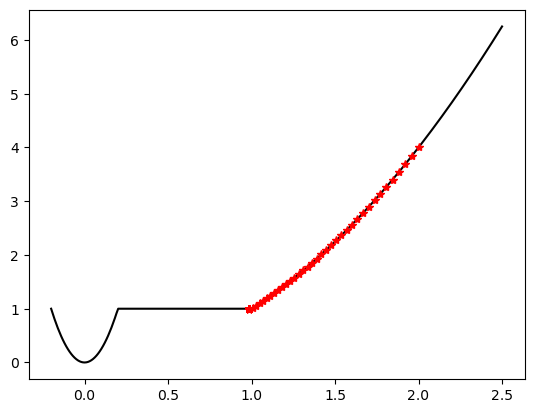

  1번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 2.000 입니다.
  2번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.960 입니다.
  3번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.921 입니다.
  4번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.882 입니다.
  5번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.845 입니다.
  6번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.808 입니다.
  7번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.772 입니다.
  8번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.736 입니다.
  9번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.702 입니다.
 10번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.667 입니다.
 11번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.634 입니다.
 12번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.601 입니다.
 13번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.569 입니다.
 14번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.538 입니다.
 15번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.507 입니다.
 16번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.477 입니다.
 17번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.448 입니다.
 18번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.419 입니다.
 19번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.390 입니다.
 20번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.362 입니다.
 21번 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.335 입니다.
 22번 경사 하강법(학

In [18]:
opti = descent(0.01)
ex = one_variable_ftn(f3, opti)
ex.run(2, 100)
ex.visualize(-0.2, 2.5)
ex.history()

모멘텀(Momentum)

In [23]:
# 모멘텀 클래스, 옵티마이저
class momentum:
    def __init__(self, mu, lr, h=1e-6):
        self.previous = 0 # 이전에 얼마나 움직였는가 기록한다.
        self.mu = mu # 관성, 보통 0.8이나 0.9정도를 사용한다.
        self.lr = lr
        self.h = h
        
    def diff(self, f, x):
        # return (f(x + self.h) - f(x)) / self.h
        return (f(x + self.h) - f(x - self.h)) / (2 * self.h)
        
    def update(self, f, x):
        # dx = self.diff(f, x) # 경사 하강법
        dx = self.previous * self.mu - self.lr * self.diff(f, x)
        self.previous = dx # 이전에 움직인 거리를 저장한다.
        # return x - self.lr * dx # 경사 하강법
        return x + dx
    
    def __str__(self):
        return '모멘텀 경사 하강법(학습율 = {})'.format(self.lr)

2에서 시작해서 15번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.127 입니다.


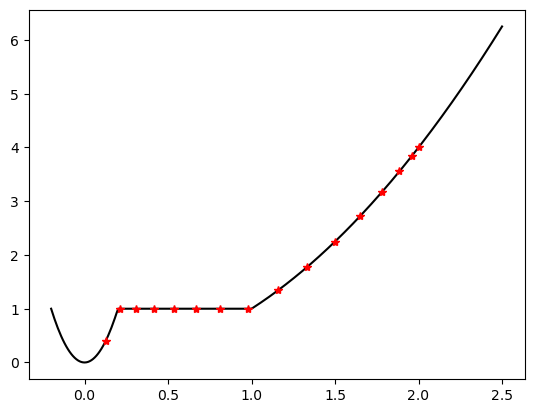

  1번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 2.000 입니다.
  2번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.960 입니다.
  3번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.885 입니다.
  4번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.779 입니다.
  5번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.649 입니다.
  6번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.499 입니다.
  7번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.333 입니다.
  8번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 1.158 입니다.
  9번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.977 입니다.
 10번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.814 입니다.
 11번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.667 입니다.
 12번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.535 입니다.
 13번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.416 입니다.
 14번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.310 입니다.
 15번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.213 입니다.
 16번 모멘텀 경사 하강법(학습율 = 0.01)을(를) 적용한 결과는 0.127 입니다.


In [29]:
opti = momentum(0.9, 0.01) # 관성 0.9, 학습율 0.01 모멘텀 옵티마이저 객체 생성
ex = one_variable_ftn(f3, opti)
ex.run(2, 15)
ex.visualize(-0.2, 2.5)
ex.history()